# M9a: PCA example using hubway data

In [3]:
library(mvtnorm) # col.norm
library(tilting) # col.norm
library(ggplot2)
library("np") #npreg: you may need to install it

hpdata <- read.csv("./data/dataset-hubway2.csv", header=TRUE, sep = ",", quote="\"",dec = ".")
hpdata$TOWN <- NULL
hpdata$year <- NULL #zero-variance

#write.table(hpdata,"./output/dataset-hubway3.csv", sep = ",",dec = ".")

colnames(hpdata)

Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-10)
[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]

Warning message in file(file, ifelse(append, "a", "w")):
“cannot open file './output/dataset-hubway3.csv': No such file or directory”


ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection


[1] 8298463

[1] 6.042771e-01 2.894908e-01 5.472845e-02 2.088380e-02 8.070953e-03
 [6] 7.527878e-03 5.156521e-03 4.158420e-03 2.770756e-03 8.854047e-04
[11] 5.298227e-04 3.409093e-04 2.925047e-04 2.548392e-04 1.805420e-04
[16] 1.269184e-04 1.101911e-04 6.733934e-05 5.227178e-05 3.766557e-05
[21] 2.182173e-05 9.486240e-06 8.368221e-06 7.049410e-06 4.480354e-06
[26] 1.962093e-06 1.796825e-06 8.884456e-07 4.617263e-07 2.923035e-07
[31] 2.041670e-07 1.187589e-07 1.818918e-08 9.245760e-09 3.361774e-09
[36] 1.981604e-32 3.892853e-33 3.892853e-33 3.892853e-33 2.001351e-33

[1] 6.042771e-01 2.894908e-01 5.472845e-02 2.088380e-02 8.070953e-03
 [6] 7.527878e-03 5.156521e-03 4.158420e-03 2.770756e-03 8.854047e-04
[11] 5.298227e-04 3.409093e-04 2.925047e-04 2.548392e-04 1.805420e-04
[16] 1.269184e-04 1.101911e-04 6.733934e-05 5.227178e-05 3.766557e-05
[21] 2.182173e-05 9.486240e-06 8.368221e-06 7.049410e-06 4.480354e-06
[26] 1.962093e-06 1.796825e-06 8.884456e-07 4.617263e-07 2.923035e-07
[31] 2.041670e-07 1.187589e-07 1.818918e-08 9.245760e-09 3.361774e-09
[36] 1.981604e-32 3.892853e-33 3.892853e-33 3.892853e-33 2.001351e-33

[1] 0.6042771 0.8937679 0.9484963 0.9693801 0.9774511 0.9849789 0.9901355
 [8] 0.9942939 0.9970646 0.9979500 0.9984799 0.9988208 0.9991133 0.9993681
[15] 0.9995487 0.9996756 0.9997858 0.9998531 0.9999054 0.9999430 0.9999649
[22] 0.9999743 0.9999827 0.9999898 0.9999942 0.9999962 0.9999980 0.9999989
[29] 0.9999994 0.9999996 0.9999999 1.0000000 1.0000000 1.0000000 1.0000000
[36] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000

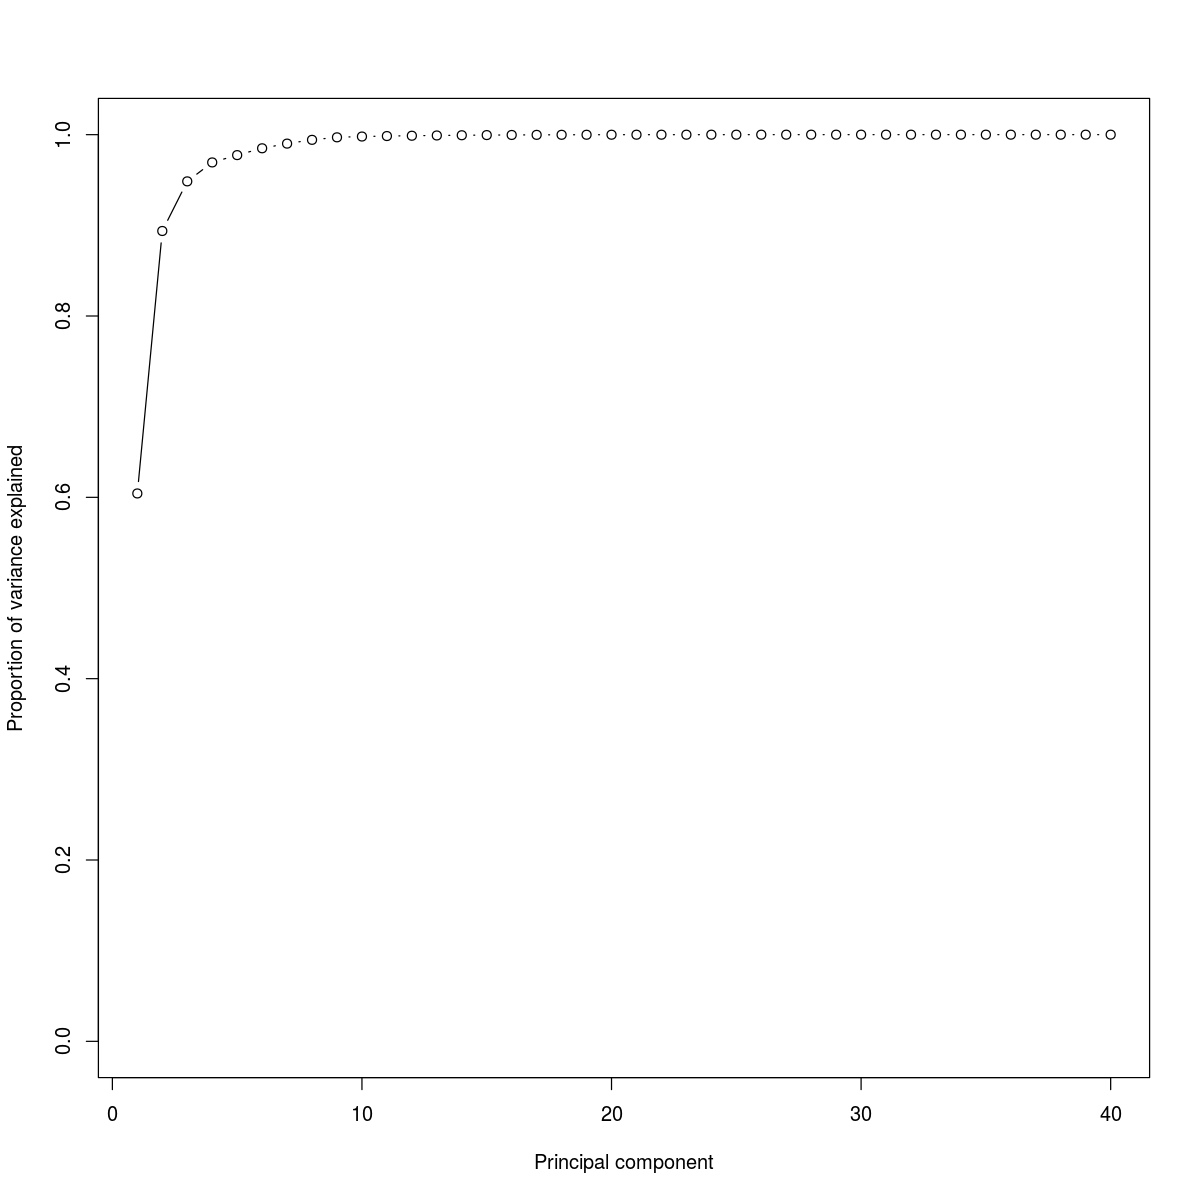

In [45]:
# PCA Scree plot without standardizing data
hpca_cov <- prcomp(hpdata, scale=FALSE)

# We can extract the information summarized above (and much more) 
# from the attributes of the object hpca_cov
standard_deviation_of_each_component <- hpca_cov$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)
var_tot
var_per_dim/var_tot



var_prop <- var_per_dim / sum(var_per_dim)
var_prop

cum_var <- cumsum(var_prop)
cum_var

plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')

In [5]:
apply(hpdata, 2, mean)
apply(hpdata, 2, var)

station_id                month                  day 
         108.4030000            8.6760000           17.8140000 
                hour       num_of_pickups      num_of_dropoffs 
          16.4610000            1.6890000            1.5820000 
         day_of_week              weekend  num_bikes_available 
           4.1190000            0.3050000            6.1740091 
  num_bikes_disabled  num_docks_available   num_docks_disabled 
           0.5509242           11.0545667            0.0155000 
              TAZ_id              Tot_Pop               HH_Pop 
         342.7660000         1152.3060000          970.5620000 
                  HH           Income_low       Income_mid_low 
         466.6050000          166.0120000          119.0760000 
     Income_mid_high          Income_high              Worker0 
          90.1840000           91.3330000          121.3940000 
             Worker1              Worker2             Worker3p 
         195.0380000          118.0830000           32.0900000 
             HHSize1              HHSize2              HHSize3 
         187.0660000          156.0640000           62.6620000 
             HHSize4             HHSize5p                 Veh0 
          36.8750000           23.9380000          164.4240000 
                Veh1                 Veh2                Veh3p 
         206.3000000           51.8100000           44.0710000 
            Tot_Vehs   Age0to4_enrollment  Age5to14_enrollment 
         457.1680000           15.8740000           71.9450000 
Age15to18_enrollment  Age19plus_commuters      Age19plus_dorms 
          46.0890000          399.6970000          160.8740000 
           num_bikes 
           6.7249333

station_id                month                  day 
        4.190073e+03         2.192432e-01         7.711252e+01 
                hour       num_of_pickups      num_of_dropoffs 
        1.625273e+01         7.657937e+00         5.332609e+00 
         day_of_week              weekend  num_bikes_available 
        3.978818e+00         2.121872e-01         2.708370e+01 
  num_bikes_disabled  num_docks_available   num_docks_disabled 
        7.127881e-01         3.924609e+01         3.230594e-02 
              TAZ_id              Tot_Pop               HH_Pop 
        5.792648e+04         1.099764e+06         9.759552e+05 
                  HH           Income_low       Income_mid_low 
        1.933000e+05         2.984625e+04         1.548867e+04 
     Income_mid_high          Income_high              Worker0 
        1.006630e+04         1.321127e+04         1.549862e+04 
             Worker1              Worker2             Worker3p 
        3.417929e+04         1.849799e+04         2.574893e+03 
             HHSize1              HHSize2              HHSize3 
        3.152252e+04         2.348663e+04         4.979639e+03 
             HHSize4             HHSize5p                 Veh0 
        2.311050e+03         1.828072e+03         2.891750e+04 
                Veh1                 Veh2                Veh3p 
        4.405780e+04         7.539145e+03         2.831519e+03 
            Tot_Vehs   Age0to4_enrollment  Age5to14_enrollment 
        2.613529e+05         1.876785e+03         3.343934e+04 
Age15to18_enrollment  Age19plus_commuters      Age19plus_dorms 
        5.618787e+04         4.464922e+06         8.625054e+05 
           num_bikes 
        2.766438e+01

From now on, we use only the correlation-matrix-based PCA (standardized). 

First, we describe with plots and comment on how the first two principal components relate to the original columns in both covariance-matrix-based PCA and correlation-matrix-based (standardized) PCA. In both cases, is it possible to give a name to each of the two principal components?

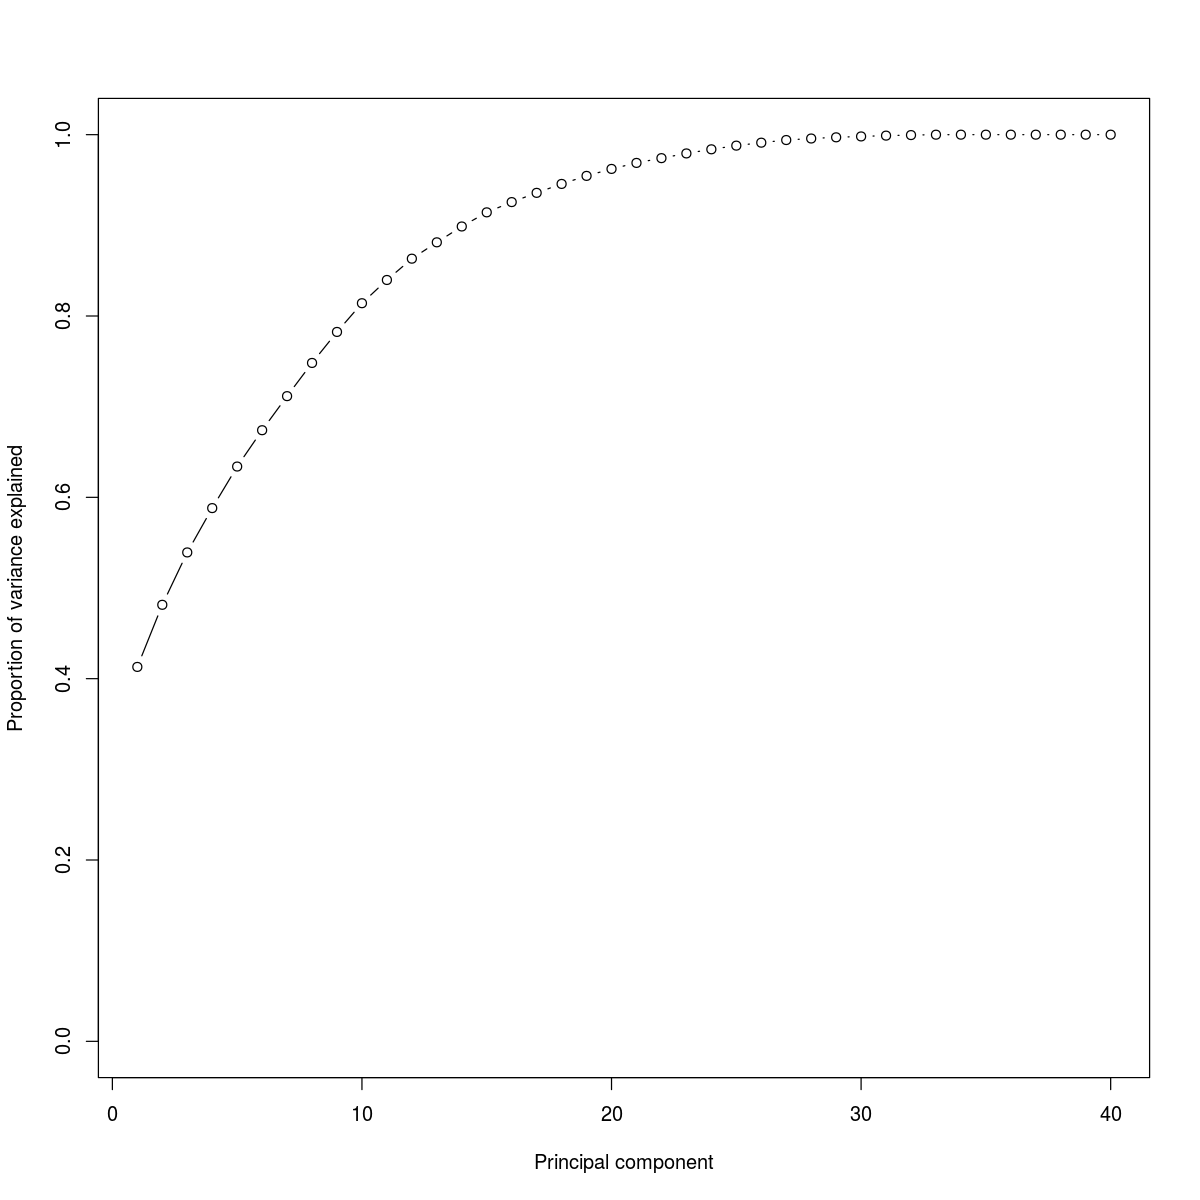

In [38]:
hpca_cor <- prcomp(hpdata, scale=TRUE)


standard_deviation_of_each_component <- hpca_var$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)

var_prop <- var_per_dim / sum(var_per_dim)

cum_var <- cumsum(var_prop)

plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')

In [46]:
eigenvectors <- hpca_cor$rotation
col.norm(eigenvectors)
eigenvectors

PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9 PC10 PC11 PC12 PC13 PC14 PC15 PC16 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
PC17 PC18 PC19 PC20 PC21 PC22 PC23 PC24 PC25 PC26 PC27 PC28 PC29 PC30 PC31 PC32 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
PC33 PC34 PC35 PC36 PC37 PC38 PC39 PC40 
   1    1    1    1    1    1    1    1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
station_id,-0.0683051454,0.127406411,-2.438988e-01,0.076445993,-0.157224882,0.121778624,-0.226892635,0.069604450,0.190496570,-0.078251798,⋯,-0.014379847,-4.429207e-05,-0.0095448899,-0.0035091584,-1.191120e-03,-6.132147e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
month,0.0029512863,0.111301970,-8.033464e-03,-0.218432057,-0.164679275,-0.057002090,0.199254049,-0.523747065,0.045327015,-0.315614826,⋯,-0.007409287,1.213712e-02,-0.0067413173,-0.0013294179,1.836260e-04,8.254209e-17,-3.573530e-16,4.510281e-17,-1.249001e-16,2.012279e-16
day,0.0028452380,-0.090474106,3.350605e-07,0.291088766,0.156710169,0.036663872,-0.275307574,0.471312239,-0.055768280,0.256352525,⋯,-0.004356224,6.807712e-03,0.0004614240,-0.0004311098,-3.214006e-07,9.346215e-17,-1.461597e-16,-1.534756e-16,-1.642630e-16,-1.563136e-16
hour,-0.0007248008,-0.017084756,-7.001248e-02,-0.003962978,-0.101396588,0.012757074,-0.103760273,-0.189212314,-0.064367334,0.098068276,⋯,-0.010753705,-4.618763e-03,-0.0045892651,0.0000896872,2.696024e-04,-1.898338e-17,7.806492e-17,-6.108621e-18,6.840302e-17,1.327063e-16
num_of_pickups,0.0531741222,-0.107295629,2.047552e-01,-0.047960419,0.376809034,0.004348261,0.212586237,-0.019380971,0.440608306,0.020719964,⋯,-0.010642303,2.615332e-03,-0.0013053961,0.0015891017,1.733498e-05,-1.072274e-16,3.606046e-16,-7.197788e-18,4.538010e-16,3.148424e-18
num_of_dropoffs,0.0376794869,-0.131814889,2.318261e-01,-0.062900441,0.394590245,0.003918883,0.195261822,0.002881967,0.395241405,0.070903567,⋯,-0.010414331,-9.283285e-03,0.0081606499,0.0015026496,-2.947763e-04,-8.325931e-17,-6.785218e-17,3.417347e-17,-2.891293e-16,-2.140206e-16
day_of_week,-0.0135188670,0.046658108,8.596311e-03,-0.543492173,-0.230107053,-0.095927238,0.040659077,0.314364357,0.088810320,0.159119343,⋯,-0.008653116,2.077725e-02,0.0024364923,0.0030659107,-1.967949e-04,1.202738e-16,-1.620728e-16,-1.714500e-16,-3.288462e-18,1.351226e-16
weekend,-0.0073963673,0.033542407,1.928546e-02,-0.541212285,-0.237536001,-0.116556237,0.054075063,0.310466759,0.098923334,0.144794144,⋯,0.006503581,-2.717625e-02,-0.0015456491,-0.0010429409,1.526270e-04,-2.147080e-16,-8.965646e-17,2.646940e-16,-1.509528e-16,-2.963336e-17
num_bikes_available,0.0009412844,-0.542574263,-1.302388e-01,-0.116988683,0.037457554,-0.046403258,-0.111216587,0.017236168,0.019823158,-0.195414936,⋯,0.004597087,-8.144133e-03,0.0010027426,-0.0009797073,2.289072e-04,6.284880e-02,-3.533734e-01,-5.951938e-01,7.207884e-02,-8.071053e-03
num_bikes_disabled,0.0044668818,-0.109313648,1.212438e-01,-0.067030610,-0.003656694,0.009647572,-0.064069672,-0.318120230,-0.006359476,0.562033752,⋯,0.006118815,-2.862799e-04,-0.0021089070,-0.0004179514,-3.929440e-04,1.019585e-02,-5.732712e-02,-9.655720e-02,1.169322e-02,-1.309352e-03


HH         HH_Pop       Tot_Vehs Income_mid_low        HHSize3 
    -0.2426455     -0.2425002     -0.2351989     -0.2343665     -0.2331383

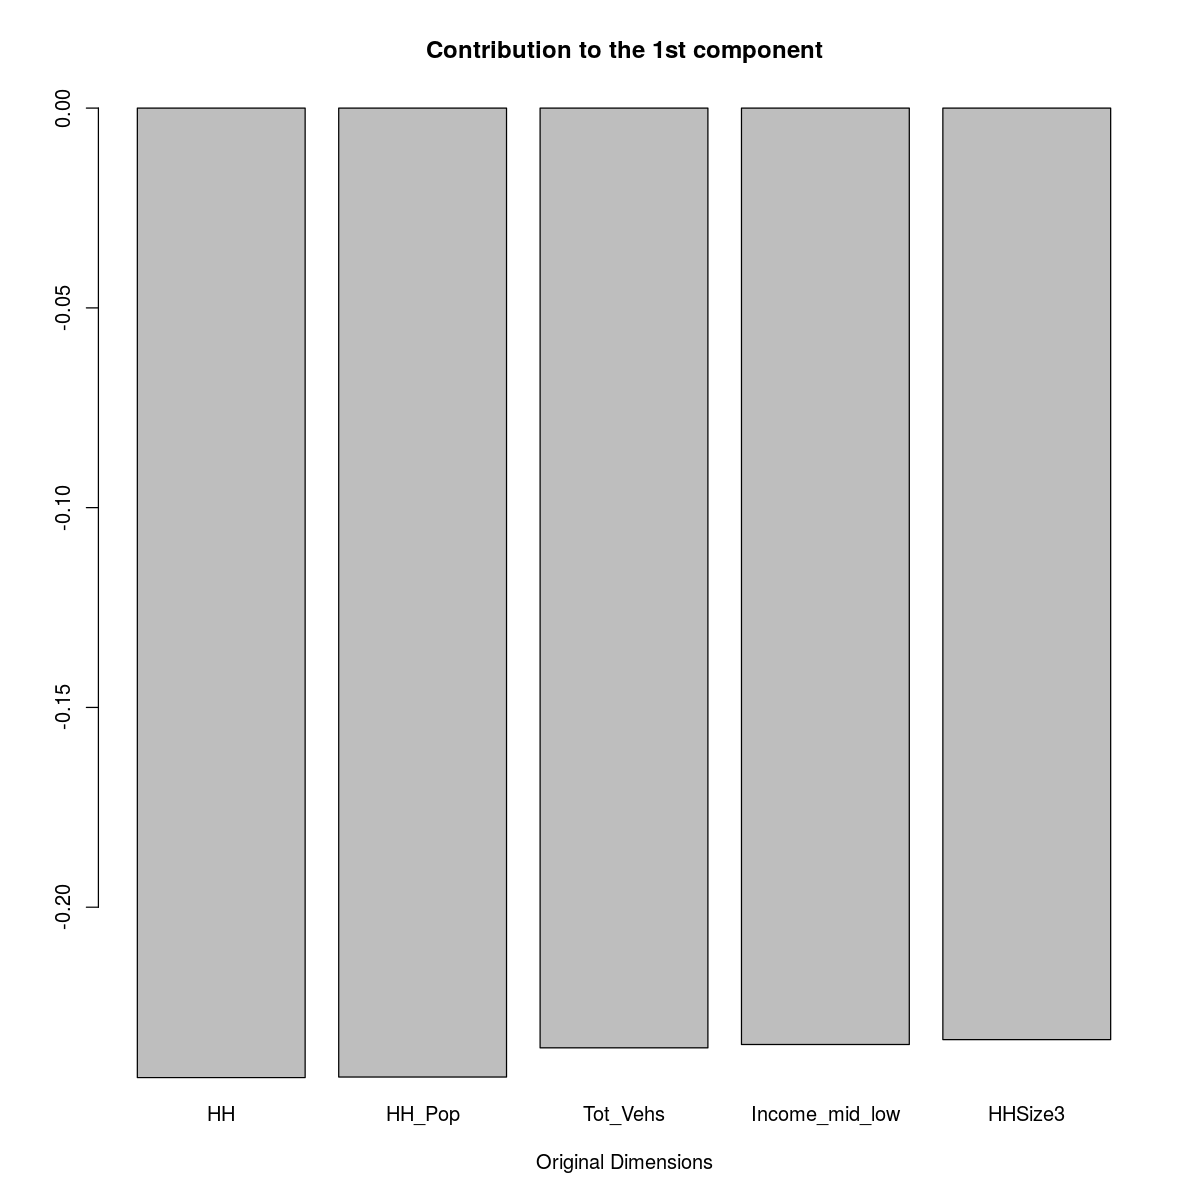

In [51]:
# Let us plot the contribution of the original dimension to the 1st PCA

PC_contr <- eigenvectors[,c("PC1")]
# PC_contr

# We order by the magnitude of the contribution
# We use the - sign because we want a descending order
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
#PC_contr

# We just select the 5 highest contributing dimensions (highest loadings)
PC_contr <- PC_contr[1:5]
PC_contr


barplot(PC_contr, main="Contribution to the 1st component", xlab="Original Dimensions") 


Since the household size-related variables have negative loadings, we can describe the first principal component as the "Small low-car-usage household"

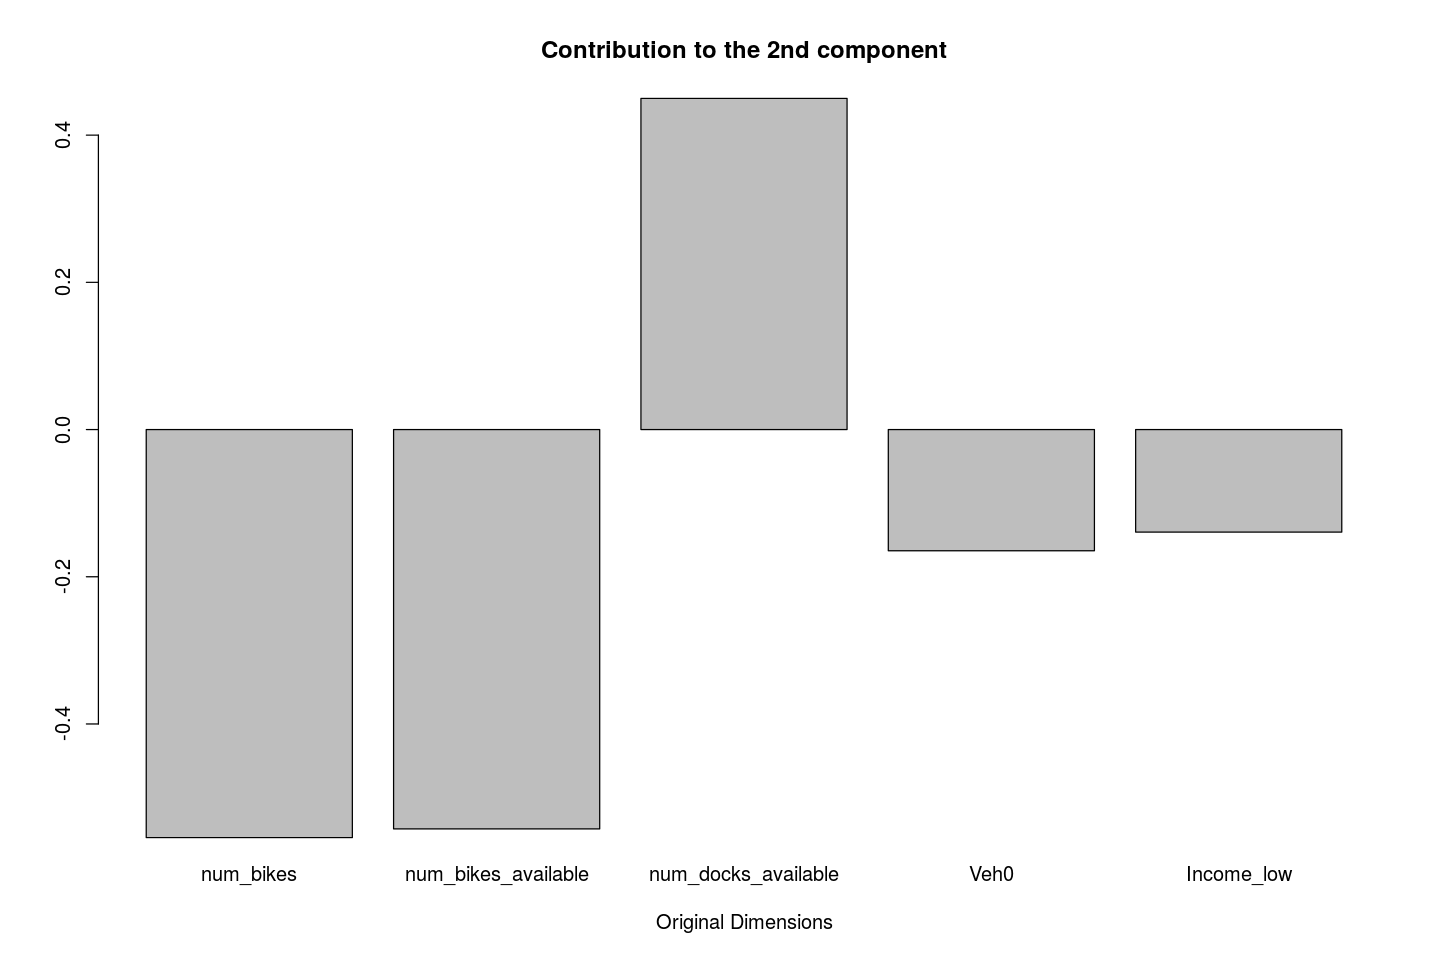

In [52]:
# Second principal component vector
PC_contr <- eigenvectors[,c("PC2")]

# We order by the magnitude of the contribution
# We use the - sign because we want a descending order
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]

# We just select the 5 highest contributing dimensions
PC_contr <- PC_contr[1:5]

options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr, main="Contribution to the 2nd component",xlab="Original Dimensions") 

Based on the value of the important loadings, the second component can be described as "Bike Usage" or "Bike unavailability"

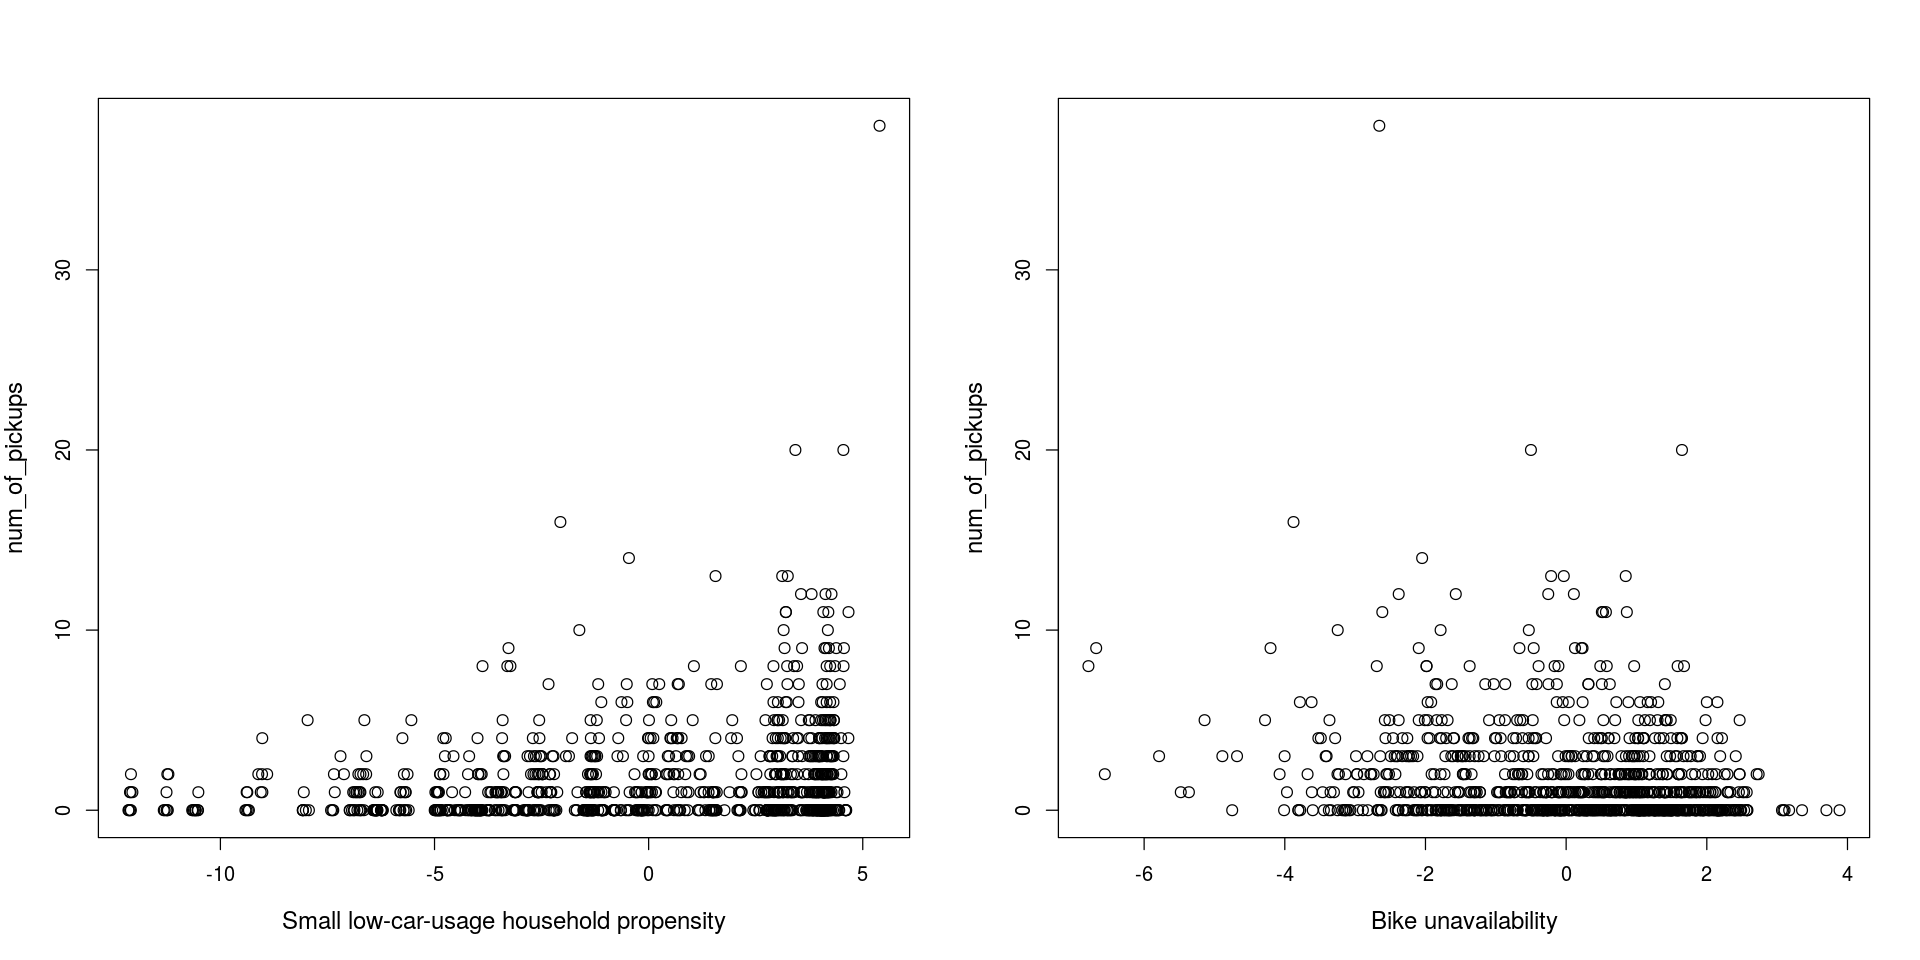

In [43]:
scores <- hpca_cor$x 
par(mfrow = c(1,2))
options(repr.plot.width=16, repr.plot.height=8)
plot(scores[,1], hpdata$num_of_pickups, xlab="Small low-car-usage household propensity", 
     ylab="num_of_pickups",cex=1.2,cex.lab=1.2)#,xlim=c(-1000,0))

plot(scores[,2], hpdata$num_of_pickups, xlab="Bike unavailability", 
     ylab="num_of_pickups",cex=1.2,cex.lab=1.2)

We show with plots and comments if the variable num of bikes can be explained by the first two principal components. We visualize in the same plot the first 2 components and some indication of the number of pickups.

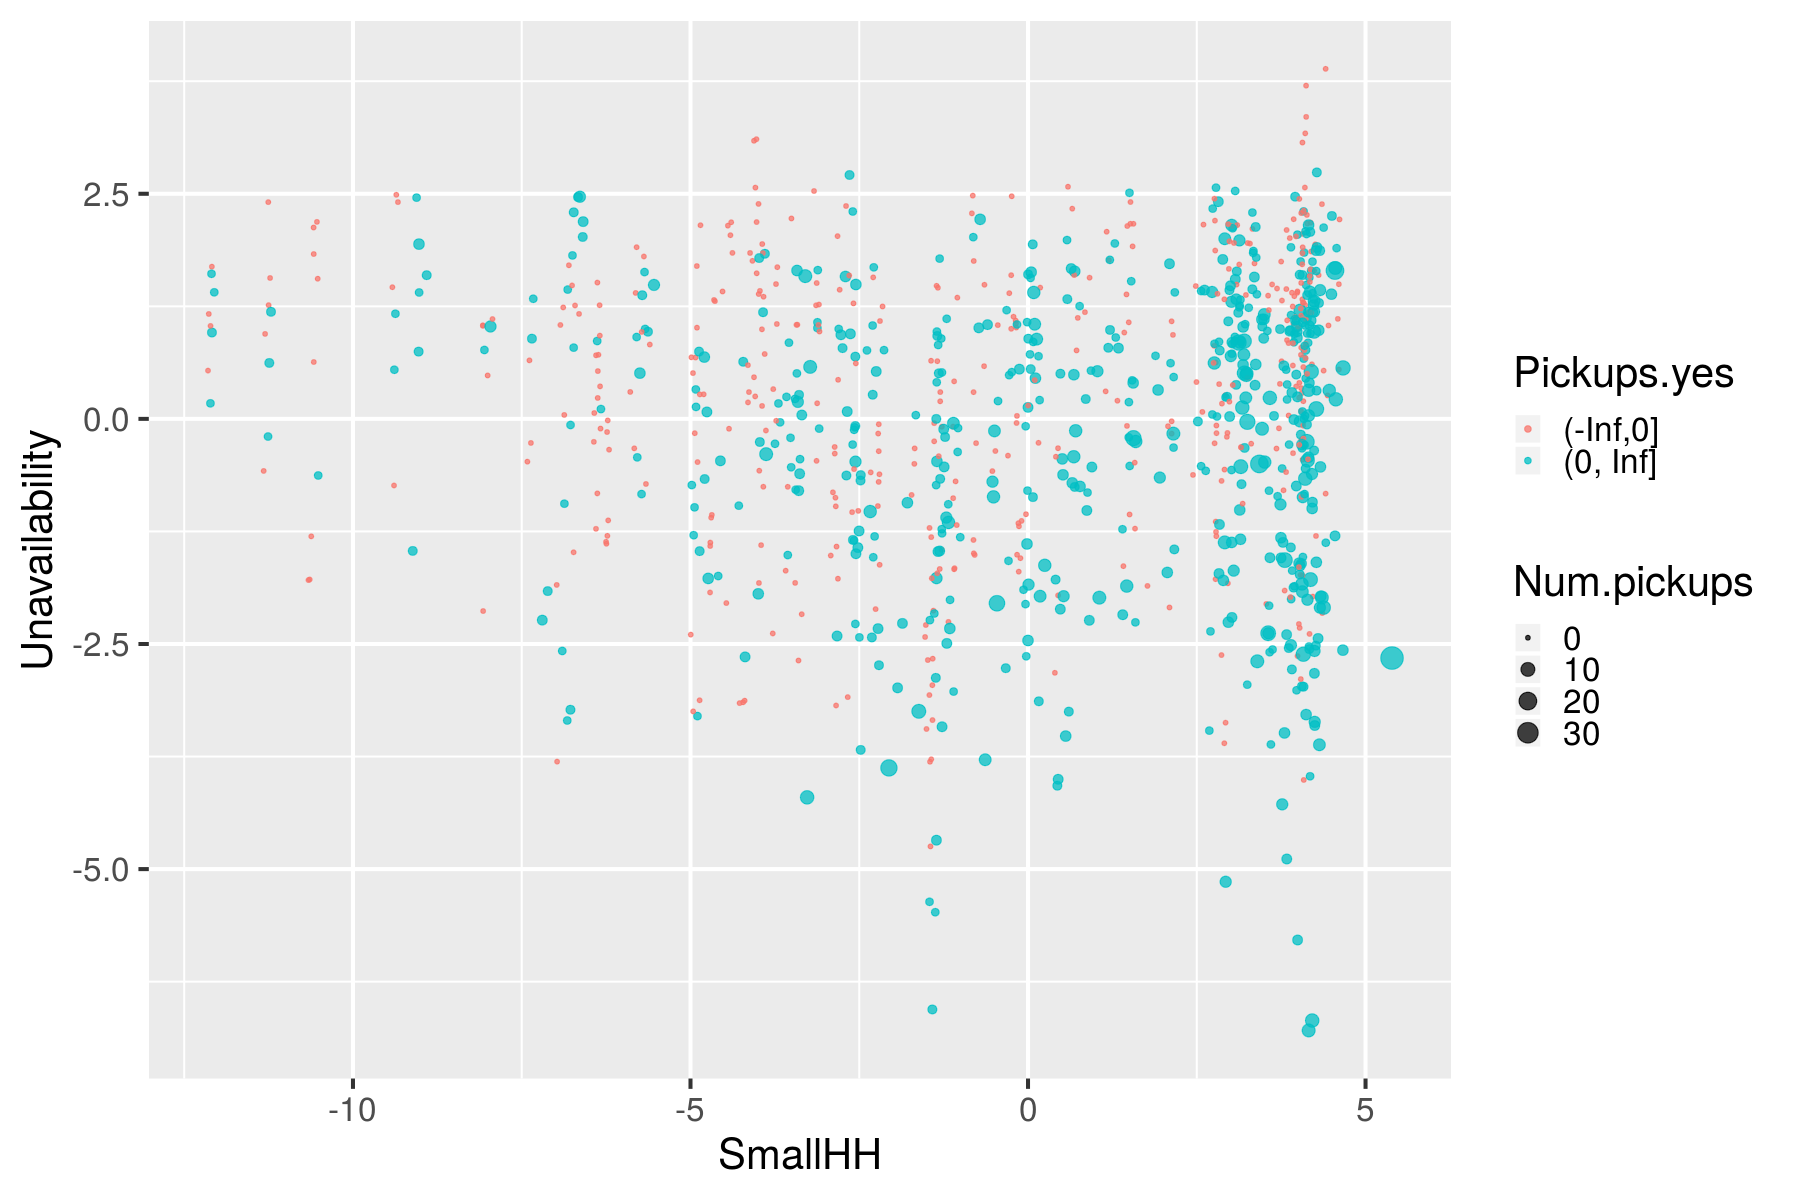

In [64]:
options(repr.plot.width=15, repr.plot.height=10)

df <- data.frame(SmallHH=scores[,1], Unavailability=scores[,2],
                Num.pickups=hpdata$num_of_pickups)
#quantile(df$pickups, 0.25)
df$Pickups.yes <- cut(df$Num.pickups, c(-Inf, 0, Inf)) # create category for pickups (yes) or no pickups

#df <- df[which(hpdata$hour>=8 & hpdata$hour<=10),]
ggplot(df, aes(x=SmallHH, y=Unavailability) ) + geom_point( aes(size=Num.pickups, color=Pickups.yes),alpha=0.75 ) + theme_gray(base_size = 25)

Comment on your observations.